In [1]:
#### STILL NEED ANALYSIS AND EXPORTS

# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
## Generate city lists

# Create lists to hold lattitude/longitude data and cities
lat_lngs = []
cities = []

# Create a set of random latitude and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat/lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm there are at least 500
len(cities)

627

In [3]:
#Set Up using information from OpenWeatherAPI documentation to prepare for calls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#Create partial query URL to use for calls 
query_url = f"{url}appid={weather_key}&units={units}&q="

In [6]:
# #Test API on one city in list to see how the information is printed out
# test_response = requests.get(query_url + cities[0])
# test_json = test_response.json()

# #pretty print test_json to get a picture of the API output so you know what to call
# import pprint as pp

# pp.pprint(test_json)

{'base': 'stations',
 'clouds': {'all': 50},
 'cod': 200,
 'coord': {'lat': -17.3383, 'lon': -49.9314},
 'dt': 1611594493,
 'id': 3464363,
 'main': {'feels_like': 32.68,
          'grnd_level': 948,
          'humidity': 43,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 31.85,
          'temp_max': 31.85,
          'temp_min': 31.85},
 'name': 'Edéia',
 'sys': {'country': 'BR', 'sunrise': 1611565425, 'sunset': 1611612010},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 10, 'speed': 2.62}}


In [26]:
#Create empty lists to receive data
temp = []
humidity = []
cloudiness = []
wind_speed = []
cities_found = []
lat_cityfound = []
lng_cityfound = []
date = []
country = []

print("Beginning Data Retrieval")
print("-------------------------")
#Loop through the list of random cities and perform a request for data on each
for city in cities:
    
    response = requests.get(query_url + city).json()

    #If city found, add data to list
    try:
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        cities_found.append(city)
        lat_cityfound.append(response['coord']['lat'])
        lng_cityfound.append(response['coord']['lon'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        print(f"Processing {city}")
    except:
        print(f"{city} not found. Skipping...")
    


Beginning Data Retrieval
-------------------------
Processing chapais
Processing tuktoyaktuk
Processing tezu
toftir not found. Skipping...
Processing ushuaia
Processing tres arroyos
Processing port elizabeth
Processing sao filipe
Processing port blair
Processing busselton
Processing southbridge
Processing cabo san lucas
Processing deputatskiy
Processing chuy
halalo not found. Skipping...
Processing vanimo
Processing punta arenas
Processing hithadhoo
illoqqortoormiut not found. Skipping...
Processing kaseda
Processing torbay
sahrak not found. Skipping...
Processing faanui
Processing saskylakh
Processing sergeyevka
Processing richards bay
meyungs not found. Skipping...
Processing albany
Processing isoka
Processing bethel
Processing tuttlingen
Processing rikitea
Processing bluefield
Processing sabha
Processing upernavik
Processing russell
Processing salalah
Processing muli
Processing new norfolk
Processing saldanha
Processing mataura
Processing galle
Processing diego de almagro
Processing

Processing norman wells
Processing svobodnyy
Processing bogalusa
Processing zyryanka
Processing marzuq
Processing lukovo
Processing miles city
Processing kruisfontein
Processing inhambane
Processing rae bareli
Processing poopo
Processing opuwo
dekoa not found. Skipping...
Processing bandarbeyla
Processing mehamn
Processing nhulunbuy
Processing praia
Processing adelaide
Processing kahului
Processing palaikastron
Processing olafsvik
Processing baherden
Processing caravelas
Processing mumford
Processing santiago
Processing swellendam
Processing college
Processing riyadh
Processing denpasar
marcona not found. Skipping...
Processing mikhaylovka
Processing gizo
Processing filingue
Processing colares
Processing pangnirtung
Processing mehran
Processing novyy oskol
Processing paamiut
Processing duncanville
Processing baykit
Processing coahuayana
Processing keelung
Processing zhangjiakou
Processing arequipa
Processing vogan
ondorhaan not found. Skipping...
Processing mawlaik
Processing broadford

In [27]:
#export city data into csv file

#create dataframe of city data
city_data_df = pd.DataFrame({"City": cities_found, "Lat": lat_cityfound, "Lng": lng_cityfound, "Max Temp": temp,
                            "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed,
                            "Country": country, "Date": date})
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chapais,49.7834,-74.8492,-13.00,72,90,2.06,CA,1611598529
1,tuktoyaktuk,69.4541,-133.0374,-19.00,84,90,4.63,CA,1611598529
2,tezu,27.9167,96.1667,15.84,44,8,1.69,IN,1611598529
3,ushuaia,-54.8000,-68.3000,12.00,40,40,3.60,AR,1611598292
4,tres arroyos,-38.3739,-60.2798,37.95,21,73,4.24,AR,1611598530
...,...,...,...,...,...,...,...,...,...
572,koupela,12.1794,-0.3517,28.74,14,1,3.61,BF,1611598622
573,chelno-vershiny,54.4333,51.1000,-4.60,97,99,5.11,RU,1611598622
574,san jose,37.3394,-121.8950,9.44,57,40,5.14,US,1611598447
575,sorsk,54.0033,90.2467,-32.63,80,28,1.04,RU,1611598623


In [28]:
#get summary statistics data frame on Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Date

lat_summary = city_data_df["Lat"].describe()
lng_summary = city_data_df["Lng"].describe()
max_temp_summary = city_data_df["Max Temp"].describe()
humidity_summary = city_data_df["Humidity"].describe()
cloudiness_summary = city_data_df["Cloudiness"].describe()
wind_speed_summary = city_data_df["Wind Speed"].describe()
date_summary = city_data_df["Date"].describe()

summary_df = pd.DataFrame({"Lat":lat_summary,"Lng":lng_summary,"Max Temp": max_temp_summary,
                          "Humidity":humidity_summary,"Cloudiness":cloudiness_summary,
                           "Wind Speed":wind_speed_summary,"Date":date_summary})

summary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,19.160580,22.272267,10.185754,72.681109,55.341421,3.641854,1.611599e+09
std,33.398192,87.795152,19.344163,20.025649,38.568521,2.607961,7.535078e+01
min,-54.800000,-179.166700,-48.490000,11.000000,0.000000,0.140000,1.611598e+09
25%,-8.103000,-57.601700,0.000000,64.000000,16.000000,1.540000,1.611599e+09
50%,21.444700,26.362500,17.420000,78.000000,69.000000,3.090000,1.611599e+09
75%,47.983300,100.335400,25.110000,88.000000,90.000000,5.070000,1.611599e+09
max,78.218600,179.316700,37.950000,100.000000,100.000000,15.460000,1.611599e+09


In [7]:
#Inspect data and skip cities with humidity > 100 
big_humid_indx = city_data_df.index[city_data_df["Humidity"]>100]
big_humid_indx

#if no city has humidity > 100, skip this step
#create new data frame
#clean_city_df = city_data_df.drop(big_humid)

Int64Index([], dtype='int64')

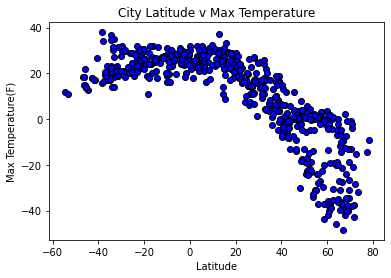

In [38]:
#Create Scatter Plot of Temp vs Latitude
plt.scatter(lat_cityfound, temp, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

# plt.savefig("../Images/LatTemp.png")
plt.show()

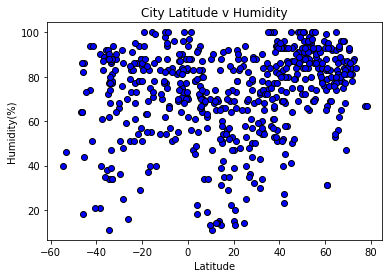

In [39]:
#Create Scatter Plot of Humidity vs Latitude
plt.scatter(lat_cityfound, humidity, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# plt.savefig("../Images/LatHumidity.png")
plt.show()

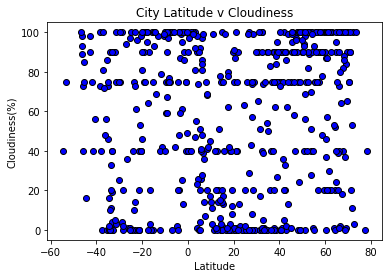

In [40]:
#Create Scatter Plot of Cloudiness vs Latitude
plt.scatter(lat_cityfound, cloudiness, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# plt.savefig("../Images/LatClouds.png")
plt.show()

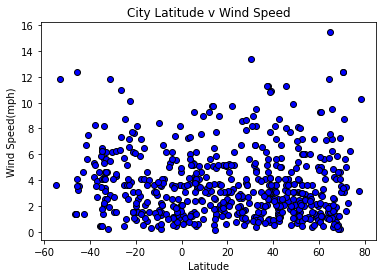

In [41]:
#Create Scatter Plot of Wind Speed vs Latitude
plt.scatter(lat_cityfound, wind_speed, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("City Latitude v Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

# plt.savefig("../Images/LatWind.png")
plt.show()

In [55]:
#Separate plots into Northern Hemisphere and Southern Hemisphere

north_df = city_data_df.loc[city_data_df["Lat"]>=0]
south_df = city_data_df.loc[city_data_df["Lat"]<=0]

north_lat = north_df["Lat"]
south_lat = south_df["Lat"]

The r-value is: -0.8566159660419657


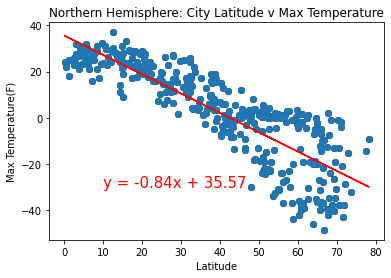

In [62]:
#Northern Hemisphere Scatter Plot of Temp vs Latitude

#Create list of north max temps
north_temp = north_df["Max Temp"]

#create scatter plot
plt.scatter(north_lat, north_temp, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere: City Latitude v Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

# Add the linear regression equation and line to plot
x_values = north_lat
y_values = north_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

# plt.savefig("../Images/NorthLatTemp.png")
plt.show()

The r-value is: 0.4546354321096


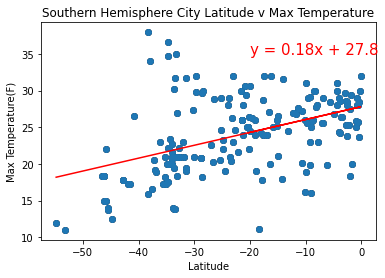

In [65]:
#Southern Hemisphere Scatter Plot of Temp vs Latitude
#Create list of north max temps
south_temp = south_df["Max Temp"]

#create scatter plot
plt.scatter(south_lat, south_temp, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere City Latitude v Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

# Add the linear regression equation and line to plot
x_values = south_lat
y_values = south_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,35),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

# plt.savefig("../Images/SouthLatTemp.png")
plt.show()

The r-value is: 0.4033679468587558


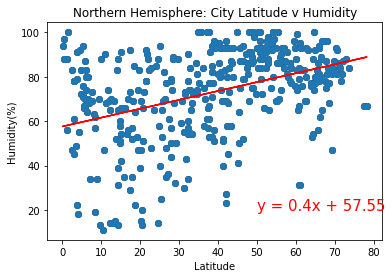

In [67]:
#Northern Hemisphere Scatter Plot of Humidity vs Latitude

#Create list of north max temps
north_humidity = north_df["Humidity"]

#create scatter plot
plt.scatter(north_lat, north_humidity, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere: City Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Add the linear regression equation and line to plot
x_values = north_lat
y_values = north_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

# plt.savefig("../Images/NorthLatHumidity.png")
plt.show()

The r-value is: 0.23835560479778983


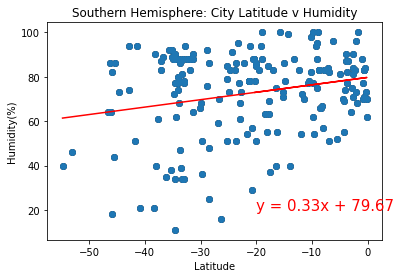

In [69]:
#Southern Hemisphere Scatter Plot of Humidity vs Latitude

#Create list of north max temps
south_humidity = south_df["Humidity"]

#create scatter plot
plt.scatter(south_lat, south_humidity, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere: City Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Add the linear regression equation and line to plot
x_values = south_lat
y_values = south_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

# plt.savefig("../Images/SouthLatHumidity.png")
plt.show()

The r-value is: 0.254837368331873


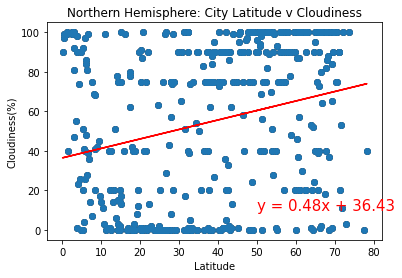

In [71]:
#Northern Hemisphere Scatter Plot of Cloudiness vs Latitude

#Create list of north max temps
north_clouds = north_df["Cloudiness"]

#create scatter plot
plt.scatter(north_lat, north_clouds, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere: City Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Add the linear regression equation and line to plot
x_values = north_lat
y_values = north_clouds
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

# plt.savefig("../Images/NorthLatCloud.png")
plt.show()

The r-value is: 0.22373813559240868


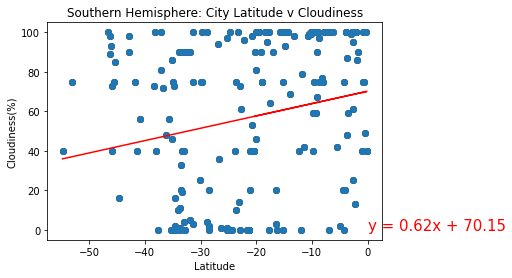

In [73]:
#Southern Hemisphere Scatter Plot of Cloudiness vs Latitude

#Create list of north max temps
south_clouds = south_df["Cloudiness"]

#create scatter plot
plt.scatter(south_lat, south_clouds, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere: City Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Add the linear regression equation and line to plot
x_values = south_lat
y_values = south_clouds
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

# plt.savefig("../Images/SouthLatCloud.png")
plt.show()

The r-value is: 0.002658632220375827


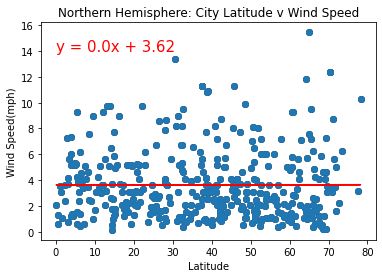

In [76]:
#Northern Hemisphere Scatter Plot of Wind Speed vs Latitude

#Create list of north max temps
north_wind = north_df["Wind Speed"]

#create scatter plot
plt.scatter(north_lat, north_wind, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere: City Latitude v Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

# Add the linear regression equation and line to plot
x_values = north_lat
y_values = north_wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,14),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

# plt.savefig("../Images/NorthLatWind.png")
plt.show()

The r-value is: -0.24555623353025005


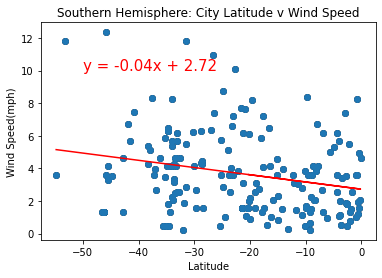

In [78]:
#Southern Hemisphere Scatter Plot of Wind Speed vs Latitude

#Create list of north max temps
south_wind = south_df["Wind Speed"]

#create scatter plot
plt.scatter(south_lat, south_wind, facecolors="blue", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere: City Latitude v Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

# Add the linear regression equation and line to plot
x_values = south_lat
y_values = south_wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")

# plt.savefig("../Images/SouthLatWind.png")
plt.show()